In [1]:
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

data_path = "data.csv"
date_cero = pd.to_datetime(1490195805, unit='s') - pd.to_datetime(1490195805, unit='s')

# Analisis de los datos

In [2]:
df = pd.read_csv(data_path)

df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])

In [3]:
df.shape

(16947, 52)

In [4]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  object        
 10  Source                

In [6]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [7]:
df.dtypes.value_counts()

object            35
int64              9
datetime64[ns]     4
float64            4
dtype: int64

In [8]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

# Desarrollo del analisis

Haciendo el analisis en el pipeline, evaluamos en funcion de las oportunidades que terminaron ya sean 'Closed Lost' como 'Closed Won' y con estos vemos tanto las fechas pactadas de delivery con la ultima modificacion y su fecha de creacion, tambien lo agrupamos por region y analizamos tambien la media de esto en 'TRF'.

In [76]:
df['Conversion_Rate'] = (df['ASP_(converted)']/df.ASP)
df['Conversion_Rate_Def'] = df.groupby('Opportunity_ID')['Conversion_Rate'].transform('mean')
df['Total_Taxable_Amount_Converted'] = df.Total_Taxable_Amount * df.Conversion_Rate_Def

df.drop(columns=['Conversion_Rate', 'Conversion_Rate_Def'])

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Taxable_Amount_Converted
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,5.964044e+06
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,5.455268e+04
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,8.386560e+04
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,7.421882e+06
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.335719e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,3.390065e+05
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None,3.390065e+05
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,3.390065e+05
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None,0.000000e+00


In [79]:
df_fin = df[(df['Stage'] == 'Closed Lost') | (df['Stage'] == 'Closed Won')]\
[['Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Opportunity_Created_Date', 'Stage', 'Last_Modified_Date', 'Region', 'Total_Taxable_Amount_Converted', 'Opportunity_ID']]

df_fin.drop_duplicates(subset='Opportunity_ID')

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,Last_Modified_Date,Region,Total_Taxable_Amount_Converted,Opportunity_ID
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,2016-06-13,EMEA,5.964044e+06,0
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,2016-01-15,EMEA,5.455268e+04,1
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,2016-09-29,Americas,8.386560e+04,2
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,2018-03-27,Americas,7.421882e+06,3
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,2018-03-27,Americas,1.335719e+07,4
...,...,...,...,...,...,...,...,...
16939,2016-04-01,2016-04-21,2015-12-04,Closed Won,2016-04-01,EMEA,4.543578e+05,12799
16940,2016-10-03,2016-12-30,2015-12-04,Closed Lost,2016-10-10,Americas,2.133250e+07,12800
16942,2016-03-21,2016-03-25,2015-12-04,Closed Won,2016-01-19,EMEA,3.390065e+05,12801
16945,2016-04-25,2016-04-29,2015-12-05,Closed Lost,2016-01-22,Americas,0.000000e+00,12802


In [80]:
df_fin['time_modified_diff'] = df_fin['Planned_Delivery_Start_Date'] - df_fin['Opportunity_Created_Date']
df_fin['time_modified_diff'] = df_fin['time_modified_diff'].dt.days
df_fin['after_time'] = (df_fin['Planned_Delivery_End_Date'] - df_fin['Last_Modified_Date']).dt.days
df_fin['ahead_of_time'] = (df_fin['Planned_Delivery_Start_Date'] - df_fin['Last_Modified_Date']).dt.days

df_fin.head()

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,Last_Modified_Date,Region,Total_Taxable_Amount_Converted,Opportunity_ID,time_modified_diff,after_time,ahead_of_time
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,2016-06-13,EMEA,5964043.80,0,146,17.0,-43
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,2016-01-15,EMEA,54552.68,1,42,5.0,3
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,2016-09-29,Americas,83865.60,2,48,-248.0,-248
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,2018-03-27,Americas,7421881.50,3,786,4.0,-54
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,2018-03-27,Americas,13357192.50,4,786,-27.0,-54


In [81]:
modified = []
j = 0
for v in df_fin['ahead_of_time']:
    actual = df_fin['after_time'].iloc[j]
    if v>0:
        modified.append('Antes')
    elif actual<0:
        modified.append('Despues')
    else:
        modified.append('Durante')
    j+=1
df_fin['modified_in_time'] = modified
df_fin

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,Last_Modified_Date,Region,Total_Taxable_Amount_Converted,Opportunity_ID,time_modified_diff,after_time,ahead_of_time,modified_in_time
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,2016-06-13,EMEA,5.964044e+06,0,146,17.0,-43,Durante
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,2016-01-15,EMEA,5.455268e+04,1,42,5.0,3,Antes
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,2016-09-29,Americas,8.386560e+04,2,48,-248.0,-248,Despues
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,2018-03-27,Americas,7.421882e+06,3,786,4.0,-54,Durante
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,2018-03-27,Americas,1.335719e+07,4,786,-27.0,-54,Despues
...,...,...,...,...,...,...,...,...,...,...,...,...
16942,2016-03-21,2016-03-25,2015-12-04,Closed Won,2016-01-19,EMEA,3.390065e+05,12801,108,66.0,62,Antes
16943,2016-04-04,2016-04-08,2015-12-04,Closed Won,2016-01-19,EMEA,3.390065e+05,12801,122,80.0,76,Antes
16944,2016-03-28,2016-03-31,2015-12-04,Closed Won,2016-01-19,EMEA,3.390065e+05,12801,115,72.0,69,Antes
16945,2016-04-25,2016-04-29,2015-12-05,Closed Lost,2016-01-22,Americas,0.000000e+00,12802,142,98.0,94,Antes


In [82]:
by_region = df_fin.groupby(['Stage', 'modified_in_time', 'Region'])\
.agg({'Total_Taxable_Amount_Converted':'count'})
by_region

Total_Taxable_Amount_Converted
Stage       modified_in_time Region                                     
Closed Lost Antes            APAC                                    507
                             Americas                                857
                             EMEA                                    765
                             Japan                                   325
                             Middle East                              11
            Despues          APAC                                    615
                             Americas                                998
                             EMEA                                   1089
                             Japan                                  1165
                             Middle East                              74
            Durante          APAC                                    230
                             Americas                                274
                             EMEA                                    322
                             Japan                                    23
                             Middle East                              32
Closed Won  Antes            APAC                                    333
                             Americas                                653
                             EMEA                                    676
                             Japan                                   835
                             Middle East                              16
            Despues          APAC                                   1344
                             Americas                               1020
                             EMEA                                   1623
                             Japan                                  2195
                             Middle East                              25
            Durante          APAC                                    217
                             Americas                                111
                             EMEA                                    167
                             Japan                                    66
                             Middle East                               9

In [83]:
by_region = by_region.reset_index()
by_region.columns = ['Stage', 'modified_in_time', 'Region', 'Total_Taxable_Amount_Converted_sum']

by_region.replace([np.inf, -np.inf], np.nan, inplace=True)
by_region.dropna(subset=['Total_Taxable_Amount_Converted_sum'], inplace=True)
by_region = by_region.sort_values('Stage', ascending = False)

## Grafico

False    8199
True     1428
Name: Total_Taxable_Amount_Converted, dtype: int64

(9627, 12)

False

Despues    5027
Antes      2416
Durante     756
Name: modified_in_time, dtype: int64

Text(0, 0.5, 'Momento de ultima modificación respecto al rango de fechas acordado para la entrega')

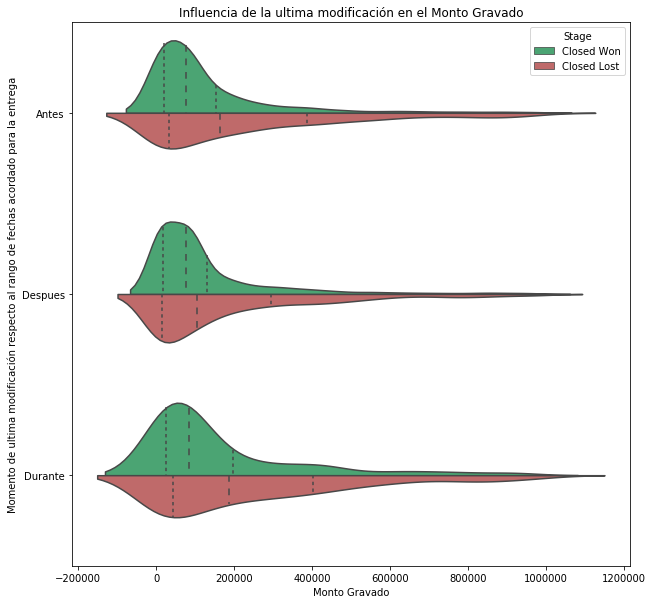

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

datos.replace([np.inf, -np.inf], np.nan, inplace=True)
datos.dropna(subset=['Total_Taxable_Amount_Converted'], inplace=True)
display((datos.Total_Taxable_Amount_Converted>1e6).value_counts())
display(datos.shape)
display(datos.modified_in_time.hasnans)
aux = datos[datos.Total_Taxable_Amount_Converted<1e6]
display(aux.modified_in_time.value_counts())
pal = {'Closed Won': 'mediumseagreen', 'Closed Lost': 'indianred'}

fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Influencia de la ultima modificación en el Monto Gravado')
sns.violinplot( y='modified_in_time', x='Total_Taxable_Amount_Converted', hue = 'Stage', data=aux, split=True,  inner="quartile", palette=pal)

ax.set_xlabel('Monto Gravado')
ax.set_ylabel('Momento de ultima modificación respecto al rango de fechas acordado para la entrega')